# Importing Different Packages Needed For The Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize'] = (12, 12)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,LabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

# importing Data

In [2]:
# Load the data
data = pd.read_csv("cardio_train.csv",sep=';')
type(data)

pandas.core.frame.DataFrame

In [3]:
data.sample(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
1470,2067,20264,1,156,52.0,100,70,1,1,0,1,1,0
3817,5404,15903,1,150,45.0,120,80,1,1,0,0,1,0
2154,3043,21879,2,174,79.0,150,90,1,1,0,0,1,0
2992,4217,17600,2,180,73.0,120,80,1,1,1,0,1,1
1638,2315,18878,2,171,75.0,120,70,1,1,1,0,1,0


In [4]:
data.shape

(4584, 13)

## cleaning and understanding our dataset

In [5]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000
mean,3234.841623,19452.983857,1.354494,164.517670,74.623429,126.625436,98.220768,1.372600,1.232548,0.088787,0.054756,0.795157,0.501745
std,1873.658337,2502.571534,0.478412,8.107458,14.830739,24.591686,217.900638,0.685818,0.578565,0.284467,0.227528,0.403631,0.500052
min,0.000000,14297.000000,1.000000,76.000000,30.000000,10.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1588.750000,17585.250000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,3230.000000,19730.500000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,4864.250000,21307.250000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,6486.000000,23670.000000,2.000000,198.000000,200.000000,906.000000,10000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
print(data['cholesterol'].unique())
data['cardio'].nunique()

[1 3 2]


2

In [7]:
data.nunique()

id             4584
age            3222
gender            2
height           61
weight          117
ap_hi            63
ap_lo            58
cholesterol       3
gluc              3
smoke             2
alco              2
active            2
cardio            2
dtype: int64

### unique values are mainly high in columns age,height,weight,ap_hi,ap_lo

In [8]:
#lets drop id as it is not relavent
data.drop("id",axis=1,inplace=True)


In [9]:
# Convert age from days to years
data['age'] = (data['age'] / 365).round().astype(int)
data.head(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,48,1,156,56.0,100,60,1,1,0,0,0,0


### later we will deal with numerical values in height,weight,ap_hi,ap_lo columns

In [10]:
data.duplicated().sum()

17

In [11]:
data.drop_duplicates(inplace=True)

In [12]:
info = ["age in days","Gender | 1: female, 2: male","Height-(cm)","Weight-(kg)","Systolic blood pressure-(norm:120 hg)","Diastolic blood pressure-(norm:80 hg)","Cholesterol | type-1: normal, 2: above normal, 3: well above normal|","Glucose | type-- 1: normal, 2: above normal, 3: well above normal |","Smoking |type- 0: do 1: dont do","Alcohol intake|type- 0: do 1: dont do ","Physical activity |type- 0: do 1: dont do","Presence or absence of cardiovascular disease"]



for i in range(len(info)):
    print(data.columns[i]+":\t\t\t"+info[i])

age:			age in days
gender:			Gender | 1: female, 2: male
height:			Height-(cm)
weight:			Weight-(kg)
ap_hi:			Systolic blood pressure-(norm:120 hg)
ap_lo:			Diastolic blood pressure-(norm:80 hg)
cholesterol:			Cholesterol | type-1: normal, 2: above normal, 3: well above normal|
gluc:			Glucose | type-- 1: normal, 2: above normal, 3: well above normal |
smoke:			Smoking |type- 0: do 1: dont do
alco:			Alcohol intake|type- 0: do 1: dont do 
active:			Physical activity |type- 0: do 1: dont do
cardio:			Presence or absence of cardiovascular disease


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4567 entries, 0 to 4583
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          4567 non-null   int32  
 1   gender       4567 non-null   int64  
 2   height       4567 non-null   int64  
 3   weight       4567 non-null   float64
 4   ap_hi        4567 non-null   int64  
 5   ap_lo        4567 non-null   int64  
 6   cholesterol  4567 non-null   int64  
 7   gluc         4567 non-null   int64  
 8   smoke        4567 non-null   int64  
 9   alco         4567 non-null   int64  
 10  active       4567 non-null   int64  
 11  cardio       4567 non-null   int64  
dtypes: float64(1), int32(1), int64(10)
memory usage: 446.0 KB


In [14]:
data.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

# thankfuly no nan values

In [15]:
data['age'].nunique()

27

In [16]:
data['cholesterol'].value_counts()

1    3402
2     623
3     542
Name: cholesterol, dtype: int64

In [17]:
data['gluc'].value_counts()

1    3859
3     358
2     350
Name: gluc, dtype: int64

In [18]:
data["bmi"] = data["weight"] / (data["height"]/100)**2

In [19]:
data.drop(["weight","height"],axis=1,inplace=True)

### check for outliers

<Figure size 9360x5760 with 0 Axes>

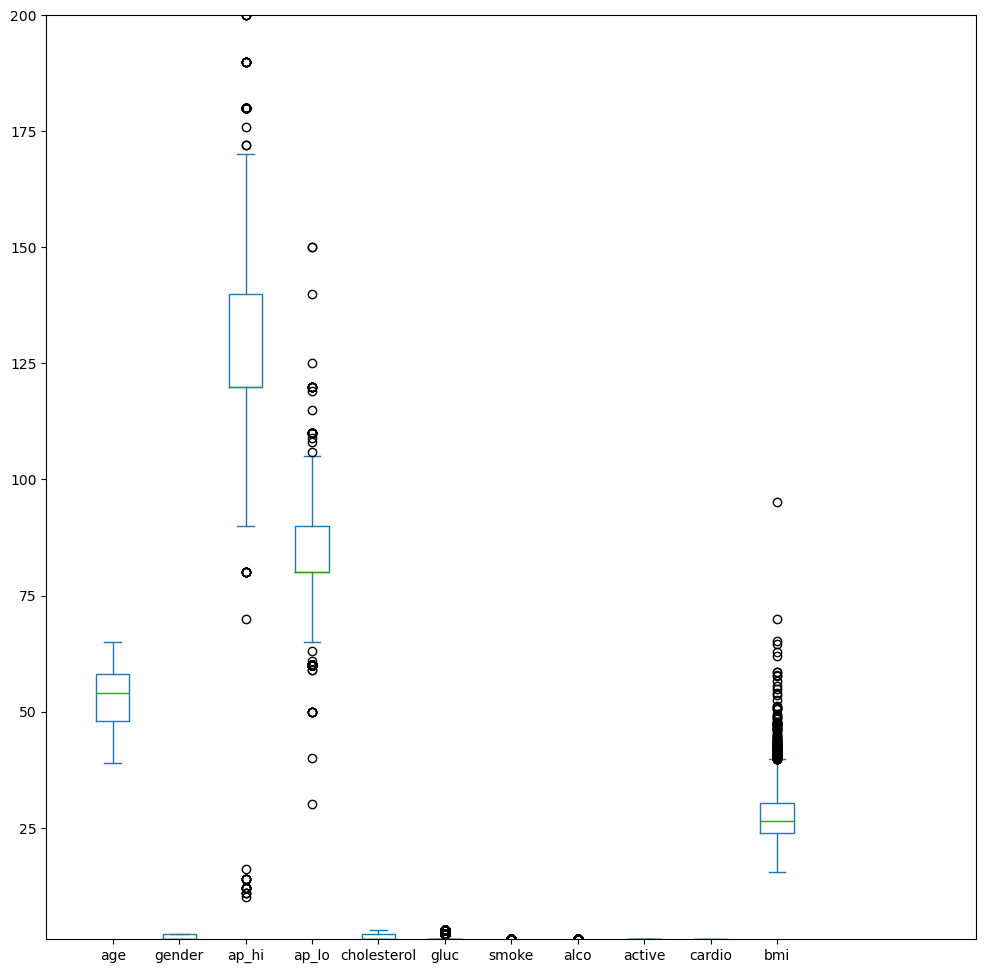

In [20]:
plt.figure(num=None, figsize=(10.4, 6.4), dpi=900, facecolor='w', edgecolor='k')
data.plot(kind='box')
plt.axis(xmin=0,xmax=14,ymin=1,ymax=200)
plt.show();

### In  some cases diastolic pressure is higher than systolic, which is  incorrect. How many records are inaccurate in terms of blood pressure?

In [21]:
print("Diastolic pressure is higher than systolic one in {0} cases".format(data[data['ap_lo']> data['ap_hi']].shape[0]))

Diastolic pressure is higher than systolic one in 92 cases


### Let's get rid of the outliers, moreover blood pressure could not be negative value!

In [22]:
print('Maximum systolic pressure:',data["ap_hi"].max())
print('Minimum systolic pressure:', data["ap_hi"].min())
print('Number of systolic pressure variables:', data["ap_hi"].nunique())

Maximum systolic pressure: 906
Minimum systolic pressure: 10
Number of systolic pressure variables: 63


In [23]:
print('Maximum diastolic pressure:',data["ap_lo"].max())
print('Minimum diastolic pressure:', data["ap_lo"].min())
print('Number of diastolic pressure variables:', data["ap_lo"].nunique())

Maximum diastolic pressure: 10000
Minimum diastolic pressure: 0
Number of diastolic pressure variables: 58


In [24]:
# data.drop(data[(data['ap_hi'] > data['ap_hi'].quantile(0.975)) | (data['ap_hi'] < data['ap_hi'].quantile(0.025))].index,inplace=True)
# data.drop(data[(data['ap_lo'] > data['ap_lo'].quantile(0.975)) | (data['ap_lo'] < data['ap_lo'].quantile(0.025))].index,inplace=True)

In [25]:
# out_filter = ((data["ap_hi"]>250) | (data["ap_lo"]>200))
out_filter = ((data["ap_hi"]>175) | (data["ap_lo"]>120))
data = data[~out_filter]
len(data)

4445

In [26]:
# out_filter2 = ((data["ap_hi"] < 0) | (data["ap_lo"] < 0))
out_filter2 = ((data["ap_hi"] < 75) | (data["ap_lo"] < 50))
data = data[~out_filter2]
len(data)

4421

In [27]:
data[data['ap_lo']> data['ap_hi']].shape[0]

1

In [28]:
#Collapse ap_hi into fewer groups
ranges = [0, 130, 180, 320]
group_names = ['Normal', 'Hypertension', 'Hypertensive crisis']
data['systolic'] = pd.cut(data['ap_hi'], bins=ranges, labels=group_names)
data['systolic'].unique()

['Normal', 'Hypertension']
Categories (3, object): ['Normal' < 'Hypertension' < 'Hypertensive crisis']

In [29]:
data[data['systolic']=='Normal']['systolic'].count()

3253

In [30]:
data[data['systolic']=='Hypertension']['systolic'].count()

1168

In [31]:
data[data['systolic']=='Hypertensive crisis']['systolic'].count()

0

In [32]:
#Collapse ap_lo into fewer groups
ranges = [-1, 81, 120, 201]
group_names = ['Normal', 'Hypertension', 'Hypertensive crisis']
data['diastolic'] = pd.cut(data['ap_lo'], bins=ranges, labels=group_names)
data['diastolic'].unique()

['Normal', 'Hypertension']
Categories (3, object): ['Normal' < 'Hypertension' < 'Hypertensive crisis']

### Let's remove bmi

In [33]:
print('Maximum body mass index:',data["bmi"].max())
print('Minimum body mass index:', data["bmi"].min())
print('Number of body mass index:', data["bmi"].nunique())

Maximum body mass index: 95.22160664819944
Minimum body mass index: 15.359168241965973
Number of body mass index: 1506


In [34]:
# out_filter2 = ((data["bmi"]>150))
out_filter2 = ((data["bmi"]>50))
data = data[~out_filter2]
len(data)

4401

In [35]:
#Collapse bmi into fewer groups
ranges = [0, 19, 25, 30, 160]
group_names = ['Underweight', 'Normal', 'Overweight', 'Obesity']
data['bmi_group'] = pd.cut(data['bmi'], bins=ranges, labels=group_names)
data['bmi_group'].unique()

['Normal', 'Obesity', 'Overweight', 'Underweight']
Categories (4, object): ['Underweight' < 'Normal' < 'Overweight' < 'Obesity']

<AxesSubplot:>

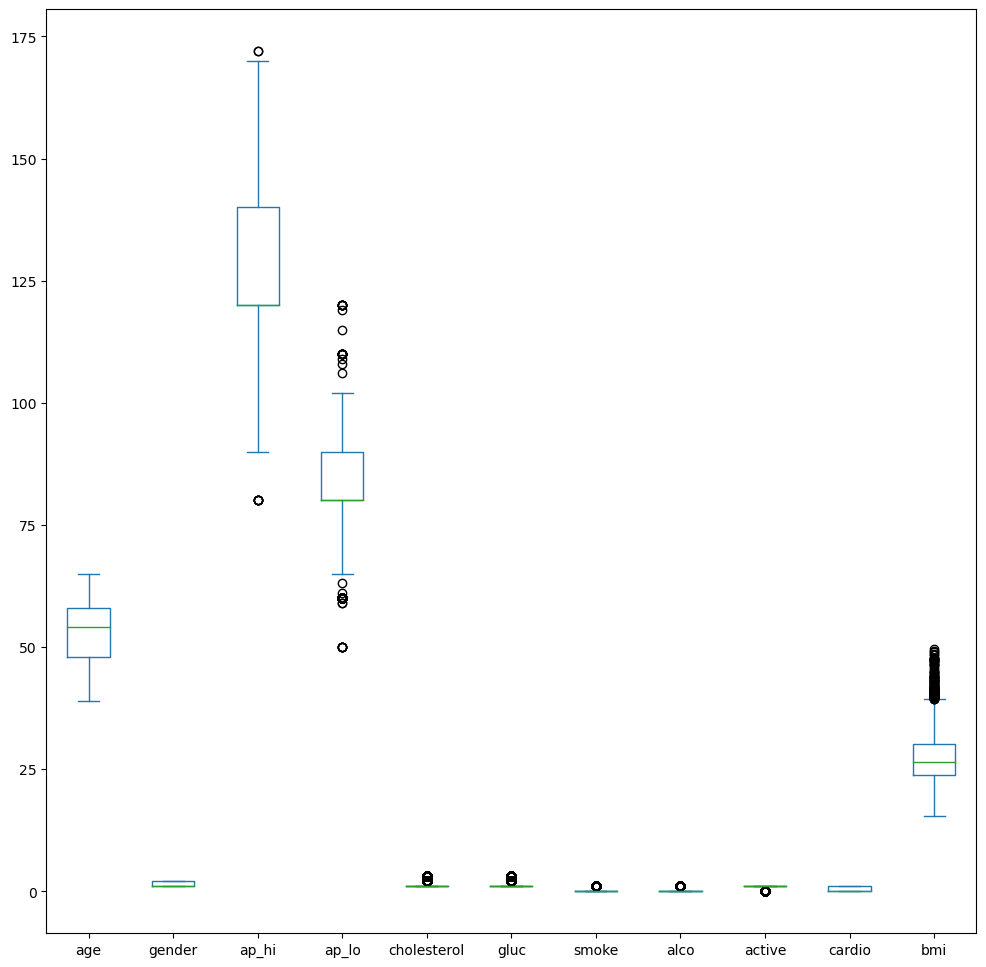

In [36]:
# plt.figure(num=None, figsize=(10.4, 6.4), dpi=900, facecolor='w', edgecolor='k')
data.plot(kind='box')
# plt.axis(xmin=0,xmax=14,ymin=-1,ymax=5)
# plt.show();


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4401 entries, 0 to 4583
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          4401 non-null   int32   
 1   gender       4401 non-null   int64   
 2   ap_hi        4401 non-null   int64   
 3   ap_lo        4401 non-null   int64   
 4   cholesterol  4401 non-null   int64   
 5   gluc         4401 non-null   int64   
 6   smoke        4401 non-null   int64   
 7   alco         4401 non-null   int64   
 8   active       4401 non-null   int64   
 9   cardio       4401 non-null   int64   
 10  bmi          4401 non-null   float64 
 11  systolic     4401 non-null   category
 12  diastolic    4401 non-null   category
 13  bmi_group    4401 non-null   category
dtypes: category(3), float64(1), int32(1), int64(9)
memory usage: 408.8 KB


In [38]:
data.describe()

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,4401.000000,4401.000000,4401.000000,4401.000000,4401.000000,4401.000000,4401.000000,4401.000000,4401.000000,4401.000000,4401.000000
mean,53.256533,1.354010,125.754374,81.085435,1.365826,1.229039,0.088843,0.054988,0.795728,0.492615,27.408105
std,6.843633,0.478267,15.227618,9.119658,0.681079,0.573888,0.284550,0.227982,0.403214,0.500002,4.995767
min,39.000000,1.000000,80.000000,50.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,15.359168
25%,48.000000,1.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,54.000000,1.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.423570
75%,58.000000,2.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.078125
max,65.000000,2.000000,172.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,49.535132


### Analysing the 'target' variable

In [39]:
data["cardio"].describe()

count    4401.000000
mean        0.492615
std         0.500002
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: cardio, dtype: float64

In [40]:
data["cardio"].unique()

array([0, 1], dtype=int64)

##### Clearly, this is a classification problem, with the target variable having values '0' and '1'

In [41]:
print(data.corr()["cardio"].abs().sort_values(ascending=False))


cardio         1.000000
ap_hi          0.439914
ap_lo          0.341308
cholesterol    0.234179
age            0.230860
bmi            0.195937
gluc           0.095397
active         0.041867
alco           0.009544
smoke          0.005771
gender         0.005232
Name: cardio, dtype: float64


In [42]:
#check for correlation among the numerical columns
correlation = data.select_dtypes('number').corr()
correlation

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
age,1.000000,-0.020323,0.201632,0.125915,0.164515,0.090181,-0.052554,-0.017929,-0.021198,0.230860,0.100052
gender,-0.020323,1.000000,0.048610,0.060699,-0.024390,-0.026367,0.338313,0.179943,0.038014,0.005232,-0.121611
ap_hi,0.201632,0.048610,1.000000,0.713992,0.184700,0.098399,0.007293,0.030667,-0.006545,0.439914,0.251816
ap_lo,0.125915,0.060699,0.713992,1.000000,0.145465,0.060790,0.004781,0.040700,-0.023313,0.341308,0.221622
cholesterol,0.164515,-0.024390,0.184700,0.145465,1.000000,0.437986,0.015201,0.019716,0.027209,0.234179,0.191800
gluc,0.090181,-0.026367,0.098399,0.060790,0.437986,1.000000,0.006187,0.013154,0.025444,0.095397,0.114843
smoke,-0.052554,0.338313,0.007293,0.004781,0.015201,0.006187,1.000000,0.327567,0.039360,-0.005771,-0.039776
alco,-0.017929,0.179943,0.030667,0.040700,0.019716,0.013154,0.327567,1.000000,0.033213,0.009544,0.035020
active,-0.021198,0.038014,-0.006545,-0.023313,0.027209,0.025444,0.039360,0.033213,1.000000,-0.041867,-0.007259
cardio,0.230860,0.005232,0.439914,0.341308,0.234179,0.095397,-0.005771,0.009544,-0.041867,1.000000,0.195937


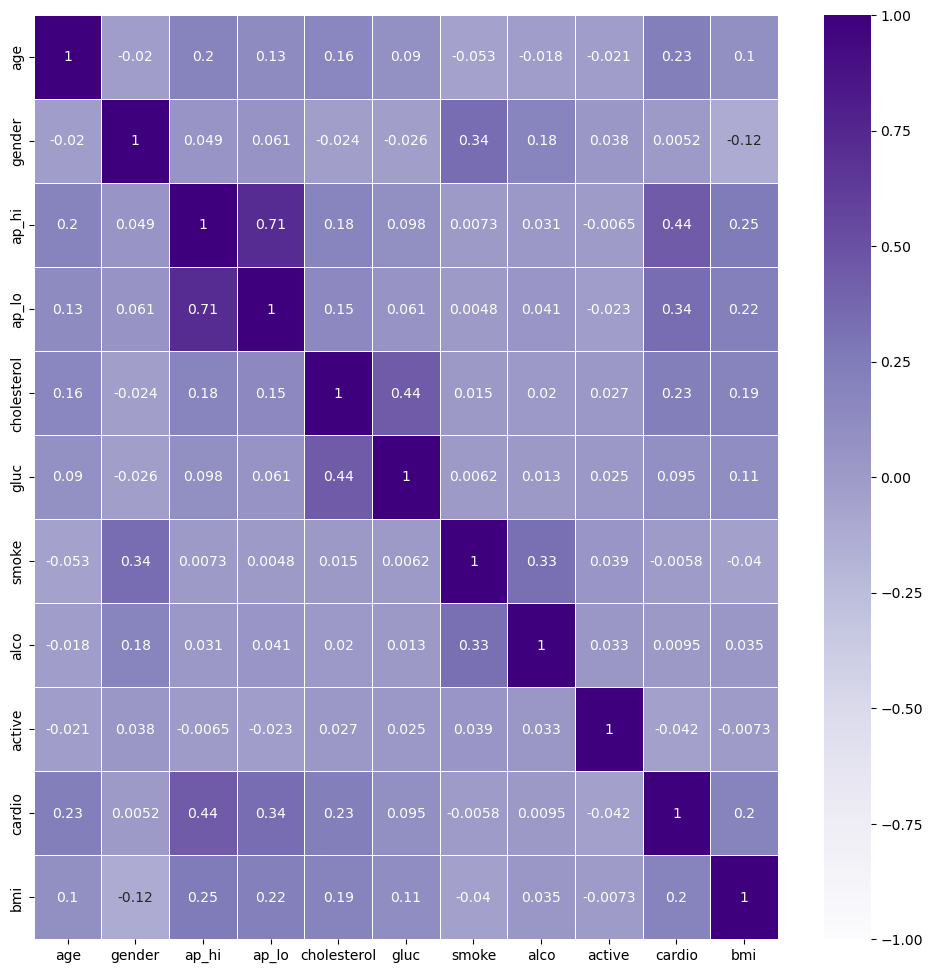

In [43]:
import seaborn as sns
#visualise the correlation
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, cmap='Purples', linewidth=0.5);

#### here we can see ap_hi and ap_lo are little bit dependent
#### gluc and cholesterol are also dependent

# analysing

## EDA

0    2233
1    2168
Name: cardio, dtype: int64


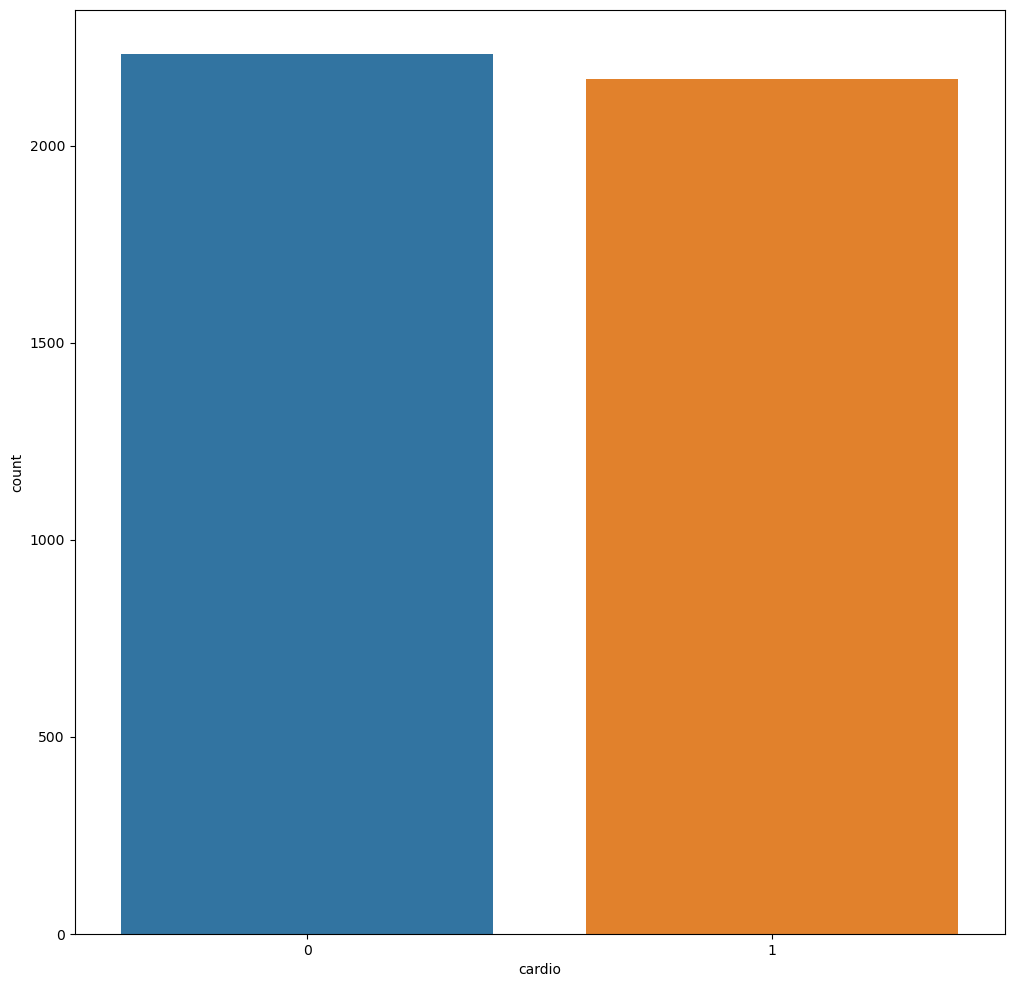

In [44]:
y = data["cardio"]
sns.countplot(y)

target_temp = data.cardio.value_counts()
print(target_temp)

<AxesSubplot:xlabel='gender', ylabel='cardio'>

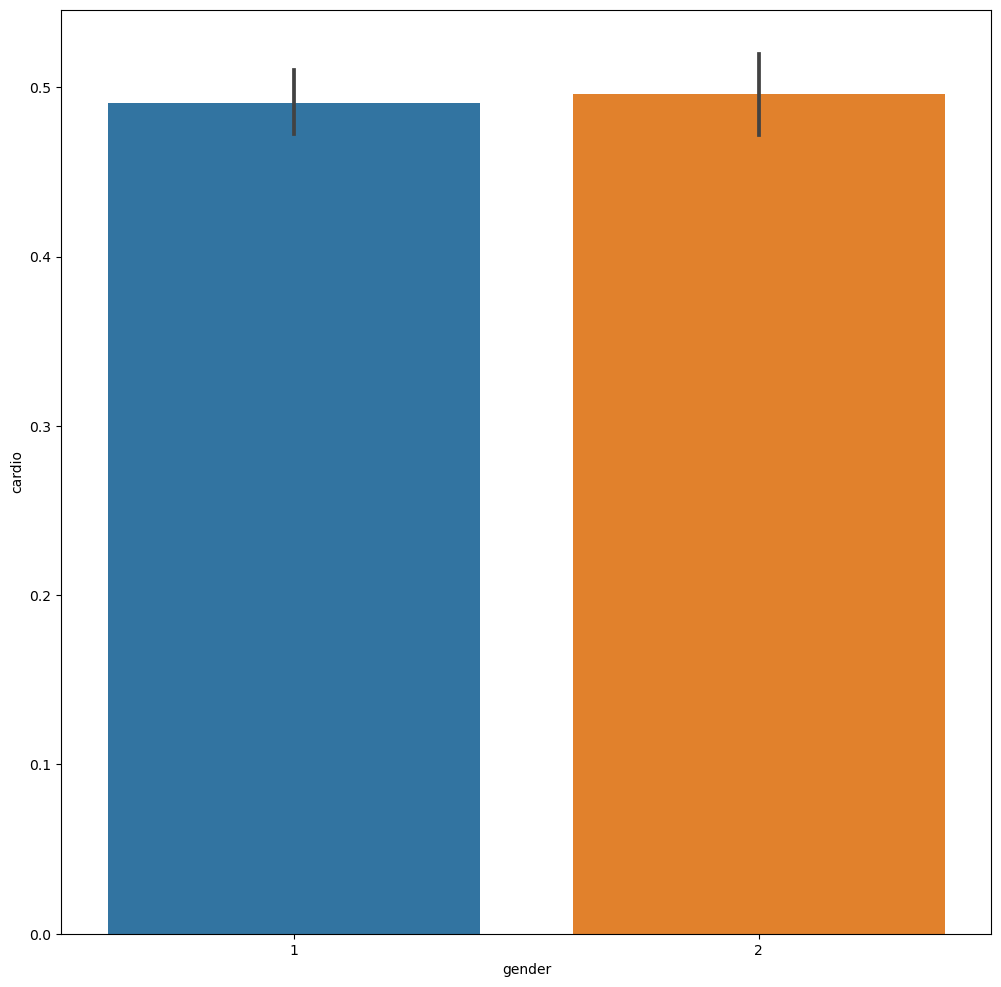

In [45]:
sns.barplot(data["gender"],y)


##### avg value of y for each men and women is ploted

<AxesSubplot:xlabel='cardio', ylabel='count'>

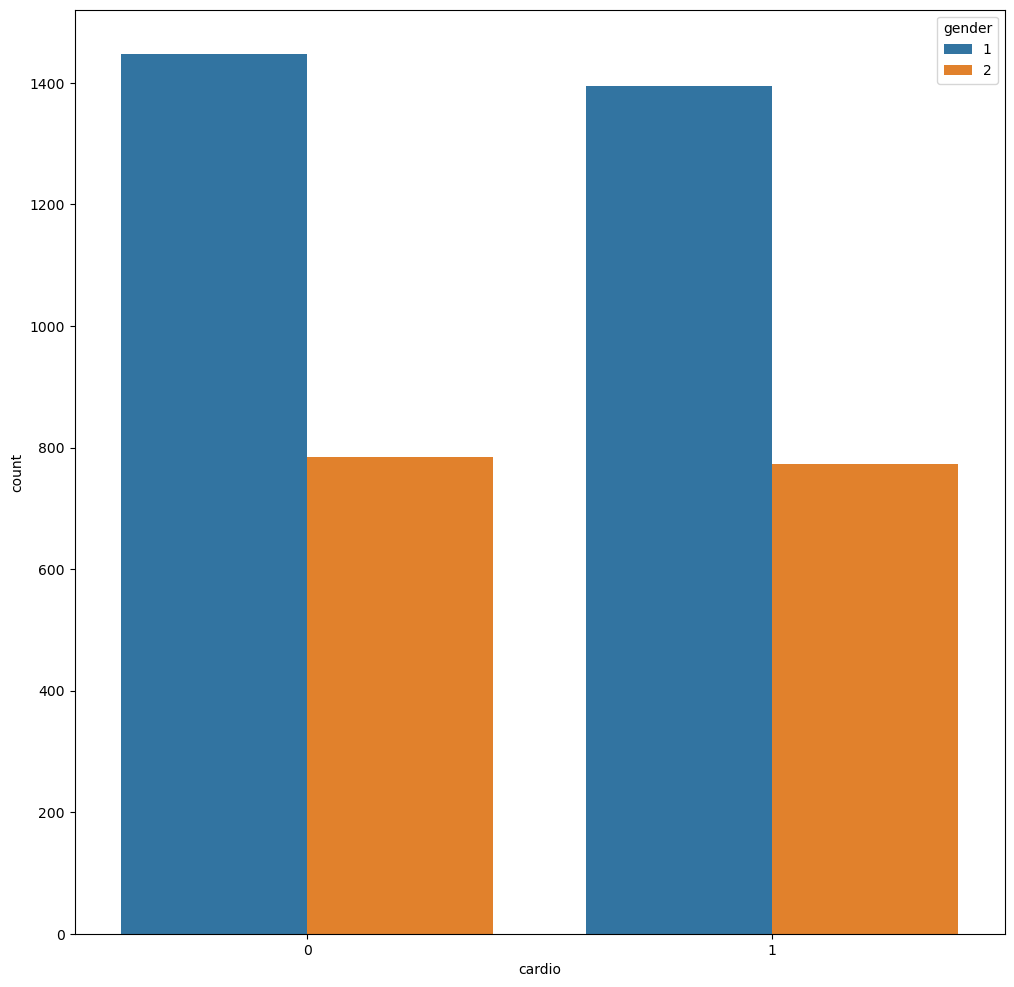

In [46]:
sns.countplot(x='cardio',hue='gender',data=data)

##### count of occurance of each category

<AxesSubplot:xlabel='cholesterol', ylabel='cardio'>

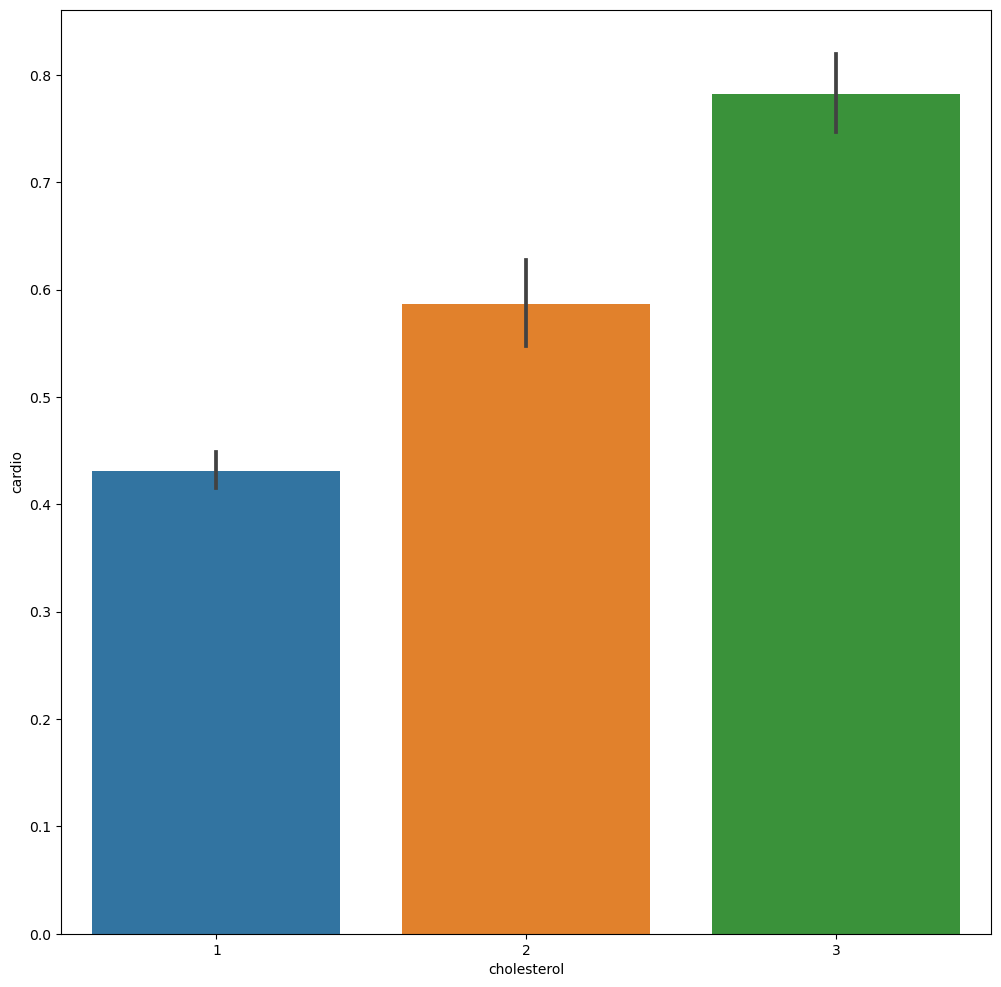

In [47]:
sns.barplot(data=data,x="cholesterol", y="cardio")
# plt.show()

In [48]:
value_counts = data.groupby(["cholesterol", "cardio"]).size()

print(value_counts)

cholesterol  cardio
1            0         1878
             1         1423
2            0          244
             1          346
3            0          111
             1          399
dtype: int64


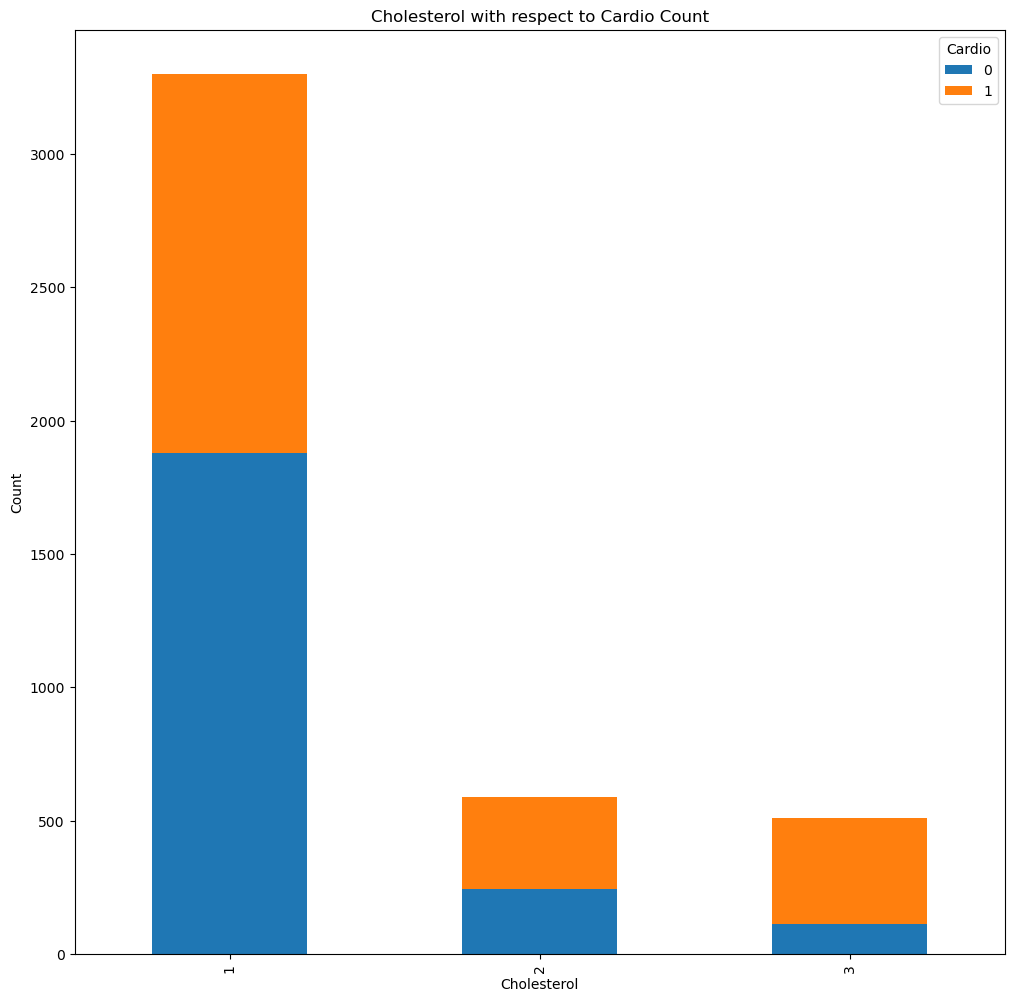

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the value count of "cardio" for each unique "cholesterol" value
value_counts = data.groupby("cholesterol")["cardio"].value_counts().unstack()

# Plot the value counts
ax = value_counts.plot(kind="bar", stacked=True)

# Customize the plot
ax.set_xlabel("Cholesterol")
ax.set_ylabel("Count")
ax.set_title("Cholesterol with respect to Cardio Count")
plt.legend(title="Cardio", loc="upper right")

# Display the plot
plt.show()

<AxesSubplot:xlabel='gluc', ylabel='cardio'>

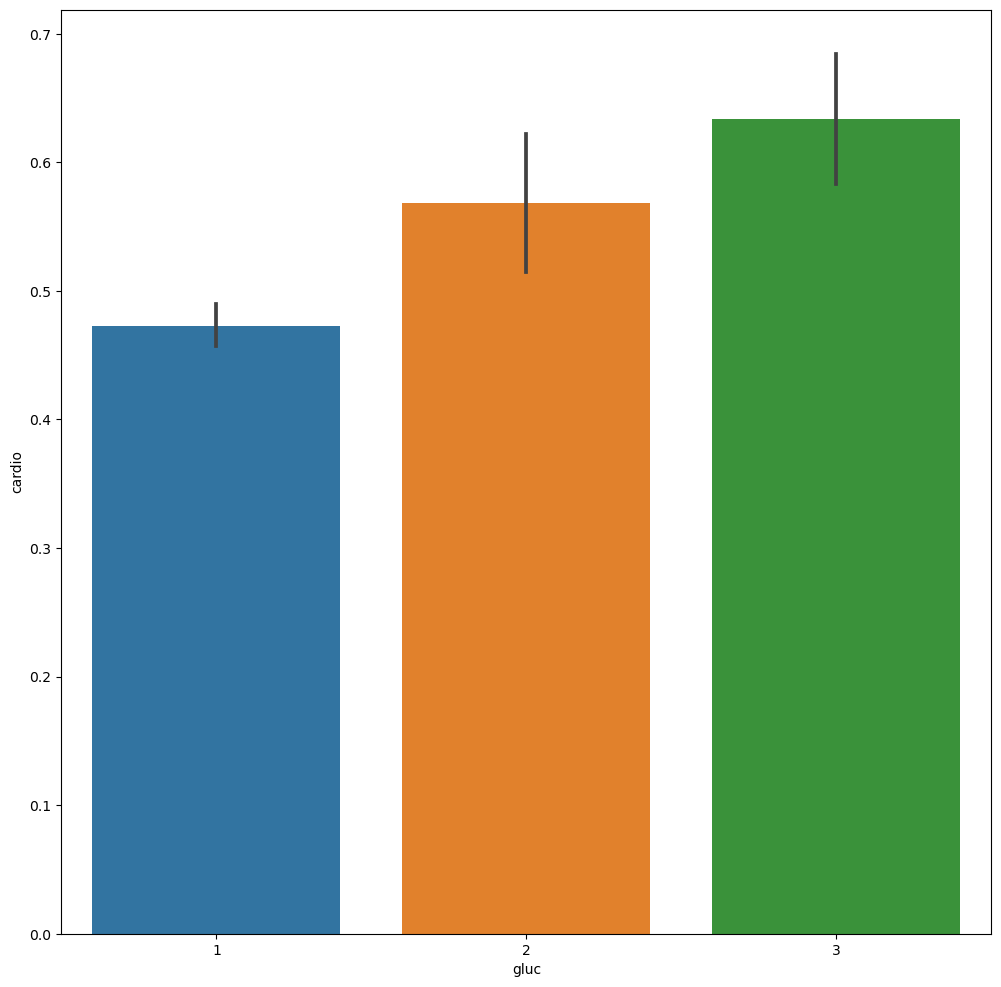

In [50]:
sns.barplot(data=data,x="gluc", y="cardio")
# plt.show()

<AxesSubplot:xlabel='smoke', ylabel='cardio'>

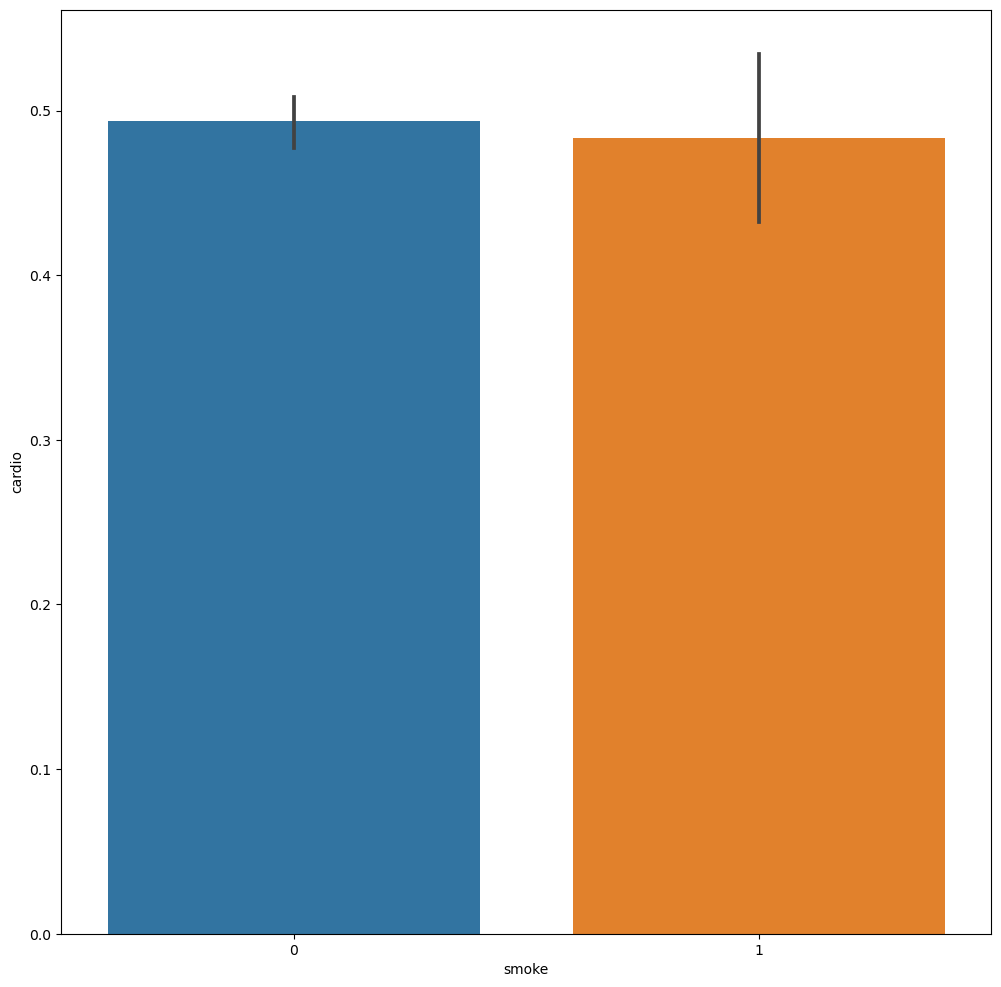

In [51]:
sns.barplot(data=data,x="smoke", y="cardio")
# plt.show()

<AxesSubplot:xlabel='alco', ylabel='cardio'>

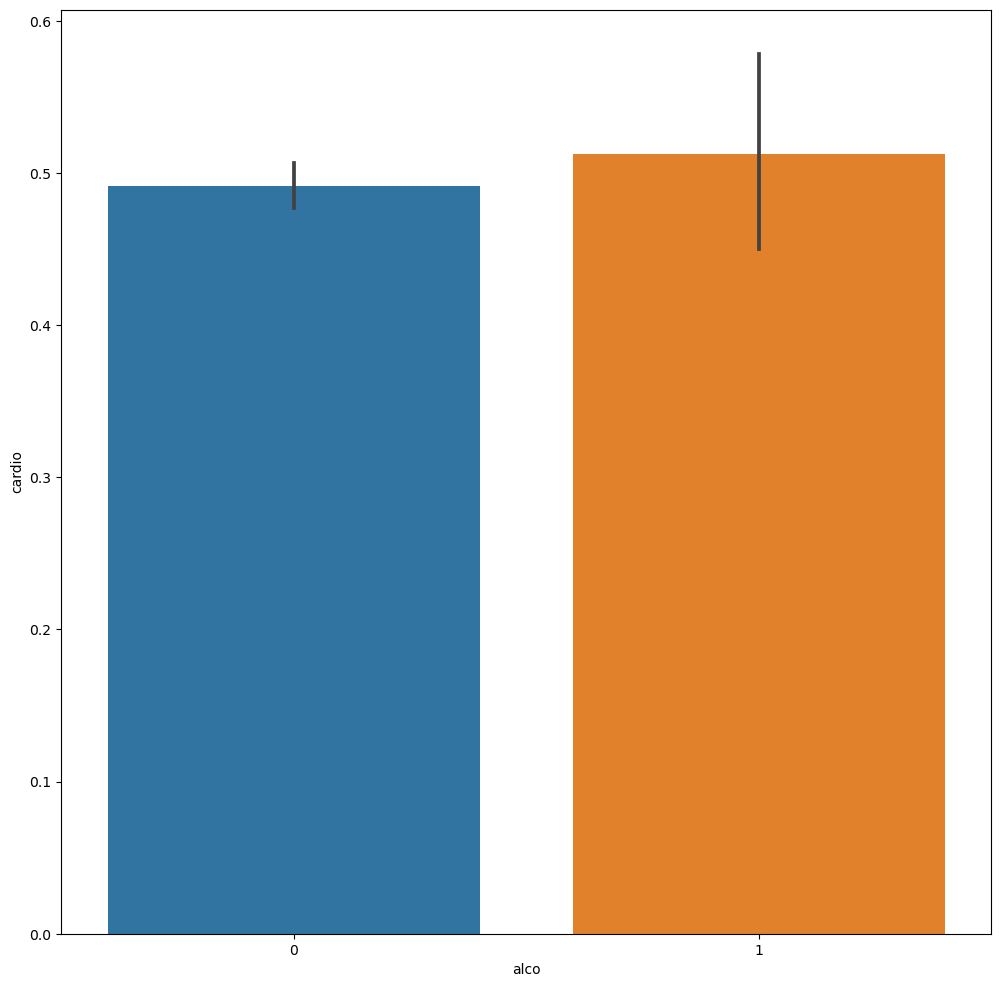

In [52]:
sns.barplot(data=data,x="alco", y="cardio")
# plt.show()

In [53]:
data.groupby('gender')['alco'].sum()

gender
1     70
2    172
Name: alco, dtype: int64

<AxesSubplot:xlabel='active', ylabel='cardio'>

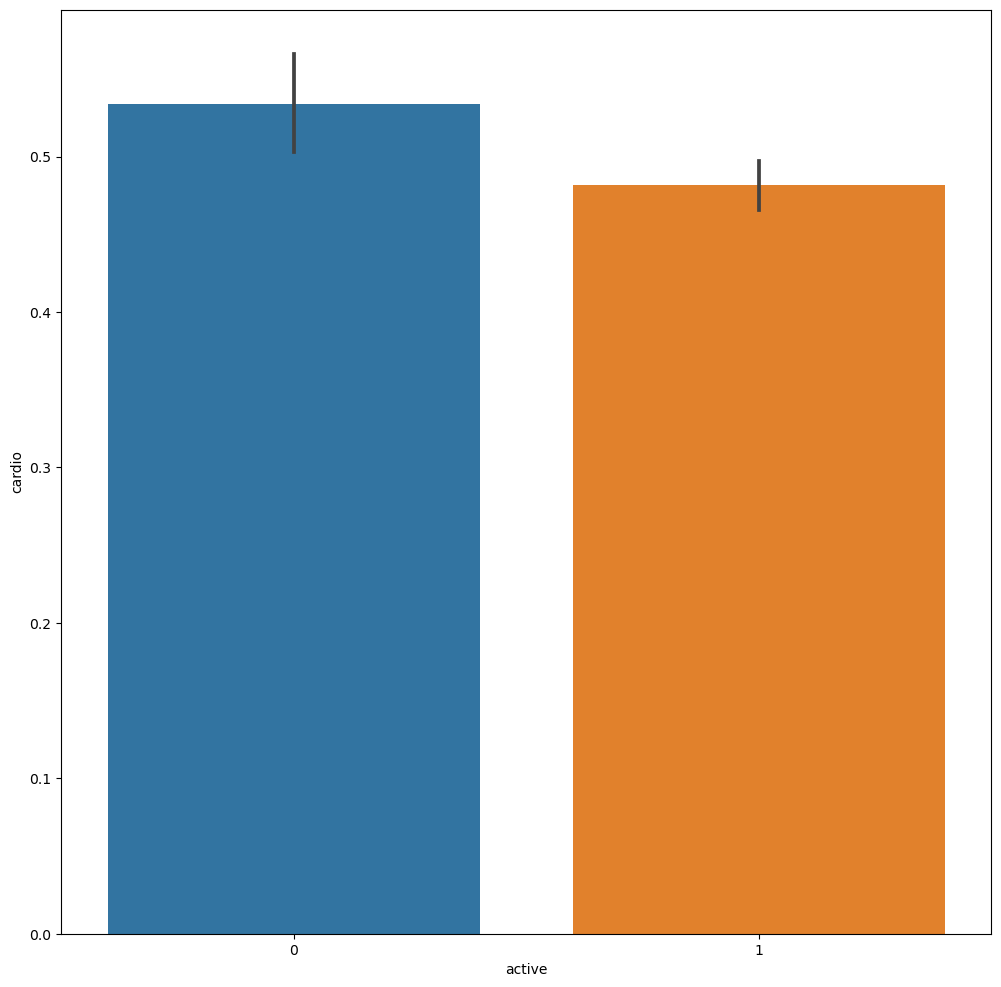

In [54]:
sns.barplot(data=data,x="active", y="cardio")
# plt.show()

<AxesSubplot:ylabel='Frequency'>

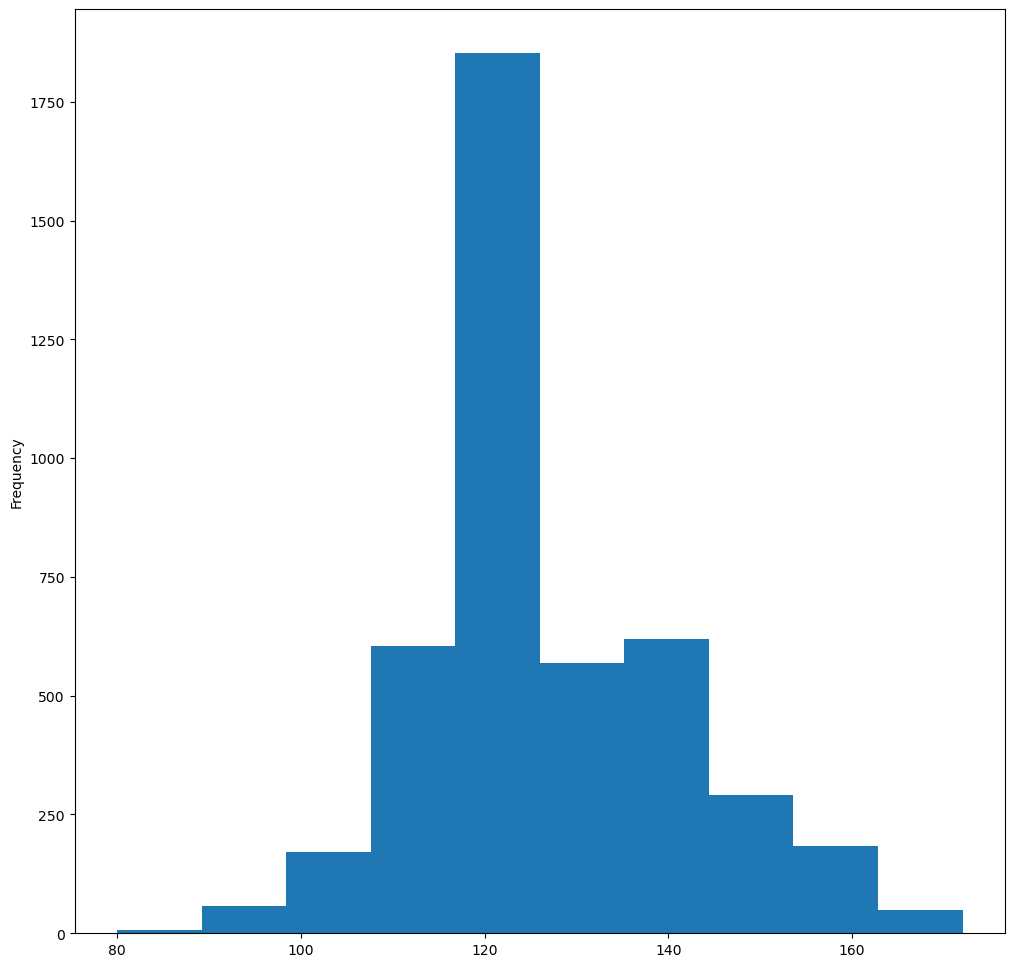

In [55]:
data['ap_hi'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

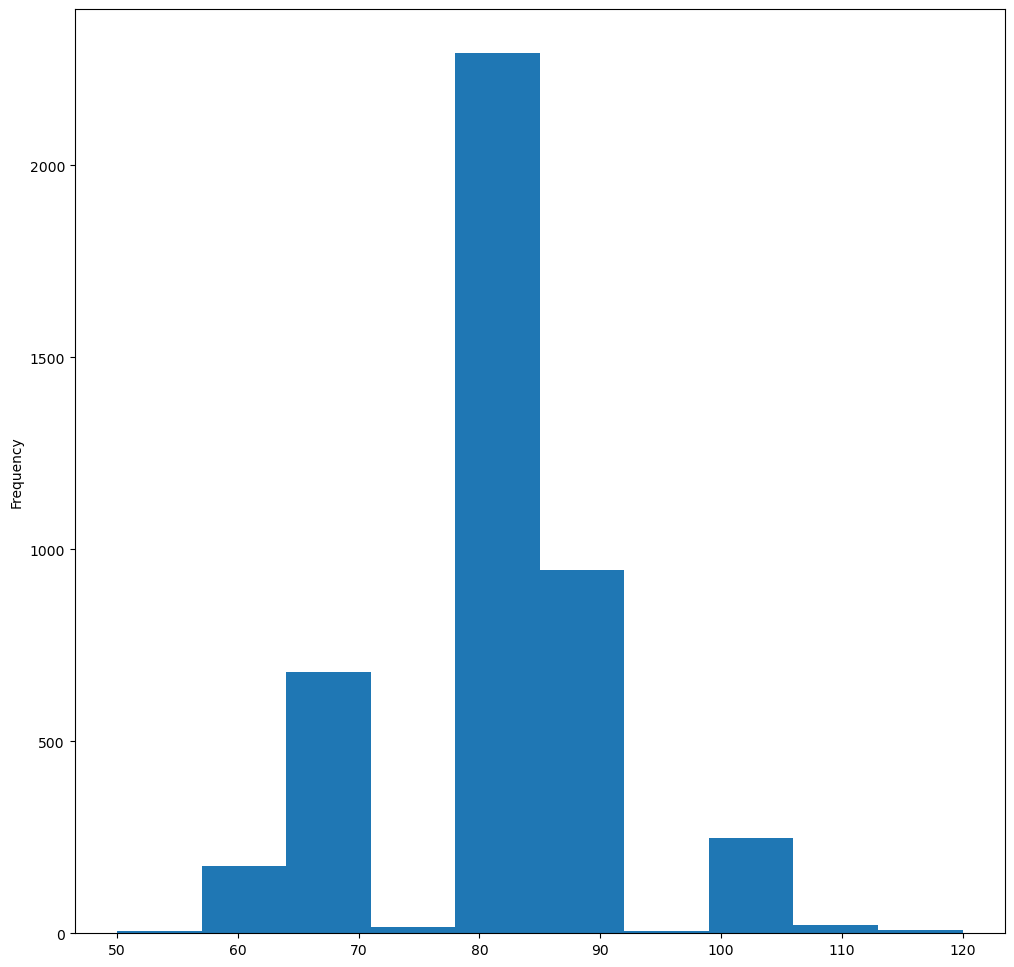

In [56]:
data['ap_lo'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

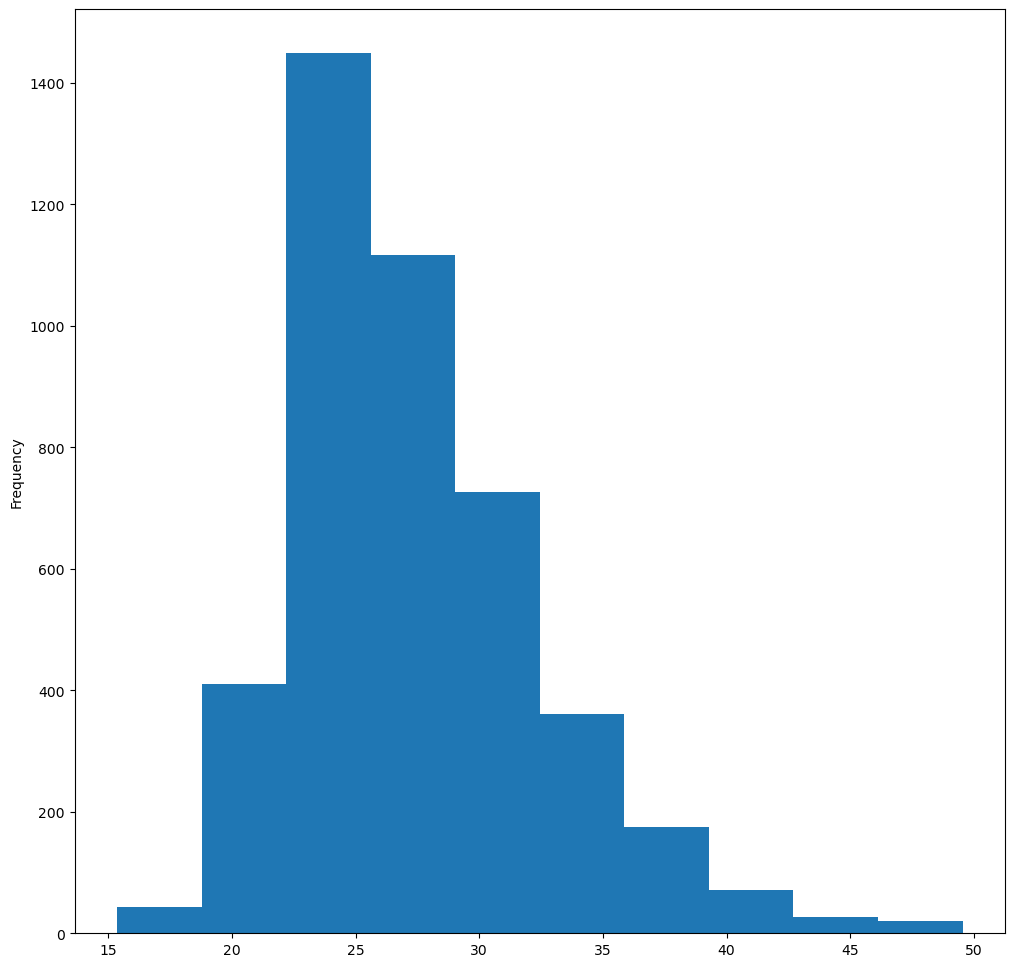

In [57]:
data['bmi'].plot.hist()

Diastilic pressure is higher than systolic one in 1 cases


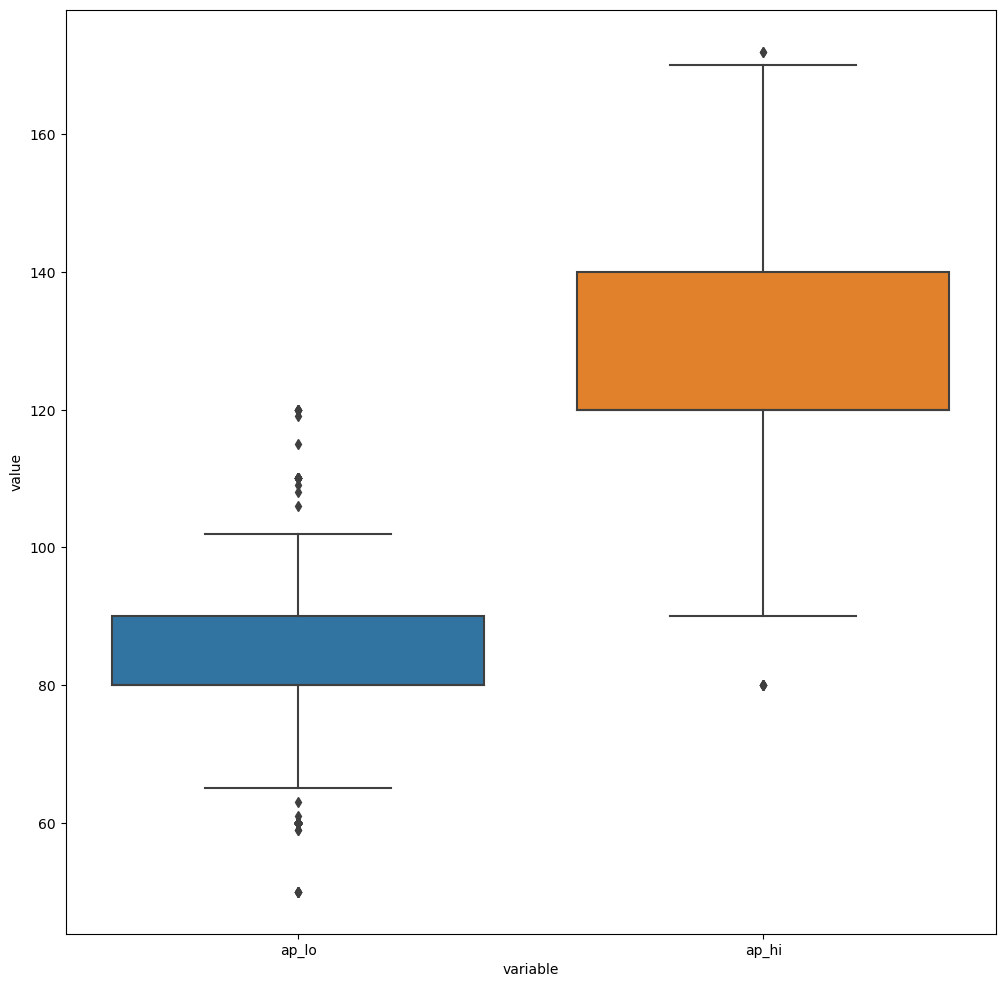

In [58]:
blood_pressure = data.loc[:,['ap_lo','ap_hi']]
sns.boxplot(x = 'variable',y = 'value',data = blood_pressure.melt())
print("Diastilic pressure is higher than systolic one in {0} cases".format(data[data['ap_lo']> data['ap_hi']].shape[0]))

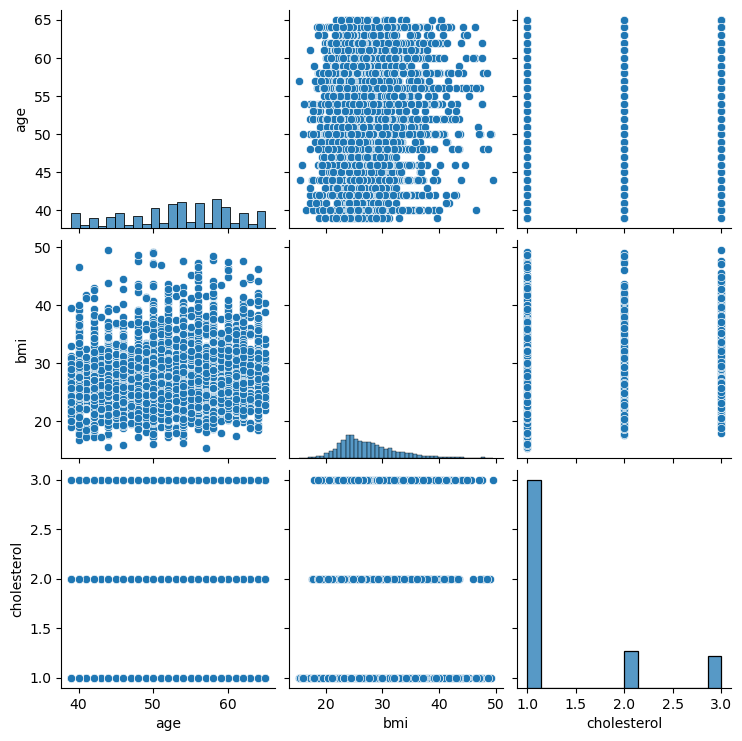

In [59]:
#Visualize the relationships among age, bmi and avg_glucose_level
columns= ['age', 'bmi', 'cholesterol']
sns.pairplot(data[columns])
plt.show()

In [60]:
print(data.corr()["cardio"].abs().sort_values(ascending=False))

cardio         1.000000
ap_hi          0.439914
ap_lo          0.341308
cholesterol    0.234179
age            0.230860
bmi            0.195937
gluc           0.095397
active         0.041867
alco           0.009544
smoke          0.005771
gender         0.005232
Name: cardio, dtype: float64


In [61]:
columns = ['bmi_group', 'systolic','diastolic', 'cholesterol','gluc','gender']

for column in columns:
    unique_values = data[column].unique()
    print(f"Unique values for {column}:{unique_values}")

Unique values for bmi_group:['Normal', 'Obesity', 'Overweight', 'Underweight']
Categories (4, object): ['Underweight' < 'Normal' < 'Overweight' < 'Obesity']
Unique values for systolic:['Normal', 'Hypertension']
Categories (3, object): ['Normal' < 'Hypertension' < 'Hypertensive crisis']
Unique values for diastolic:['Normal', 'Hypertension']
Categories (3, object): ['Normal' < 'Hypertension' < 'Hypertensive crisis']
Unique values for cholesterol:[1 3 2]
Unique values for gluc:[1 2 3]
Unique values for gender:[2 1]


## Binary Encoding:

In [62]:
lb=LabelBinarizer()
bina_cols = ['systolic', 'diastolic', 'gender']

for col in bina_cols:
    data[col]=lb.fit_transform(data[col])

In [63]:
data.head()

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,systolic,diastolic,bmi_group
0,50,1,110,80,1,1,0,0,1,0,21.967120,1,1,Normal
1,55,0,140,90,3,1,0,0,1,1,34.927679,0,0,Obesity
2,52,0,130,70,3,1,0,0,0,1,23.507805,1,1,Normal
3,48,1,150,100,1,1,0,0,1,1,28.710479,0,0,Overweight
4,48,0,100,60,1,1,0,0,0,0,23.011177,1,1,Normal


## Label Encoding:

In [64]:
#Encode for categorical columns
labelencoder=LabelEncoder()
cat_cols = [ 'bmi_group']

for col in cat_cols:
    data[col] = labelencoder.fit_transform(data[col])

In [65]:
data.sample(5)

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,systolic,diastolic,bmi_group
3121,60,0,120,90,1,1,0,0,1,0,26.149277,1,0,2
358,56,0,122,80,1,3,0,0,0,1,23.875115,1,1,0
2448,42,0,120,80,2,1,0,0,1,0,34.312524,1,1,1
420,56,0,160,90,3,3,0,0,1,1,28.515625,0,0,2
2893,47,0,120,80,1,1,0,0,1,0,25.781250,1,1,2


## One-Hot-Encoding:

In [66]:
data = pd.get_dummies(data, columns=['cholesterol', 'gluc', 'bmi_group'], drop_first=True)

In [67]:
data.sample(5)

,age,gender,ap_hi,ap_lo,smoke,alco,active,cardio,bmi,systolic,diastolic,cholesterol_2,cholesterol_3,gluc_2,gluc_3,bmi_group_1,bmi_group_2,bmi_group_3
865,51,0,150,90,1,0,1,1,26.026175,0,0,0,1,0,0,0,1,0
4479,58,1,120,80,0,0,0,0,23.183391,1,1,0,0,0,0,0,0,0
3469,40,0,140,80,0,0,1,0,24.508946,0,1,0,0,0,0,0,0,0
1142,48,1,120,80,0,0,1,1,25.909457,1,1,0,0,0,0,0,1,0
4268,60,0,130,80,0,0,1,0,25.910684,1,1,0,0,0,0,0,1,0


In [68]:
# data.drop(['ap_hi','ap_lo','bmi','age'],axis=1,inplace=True)

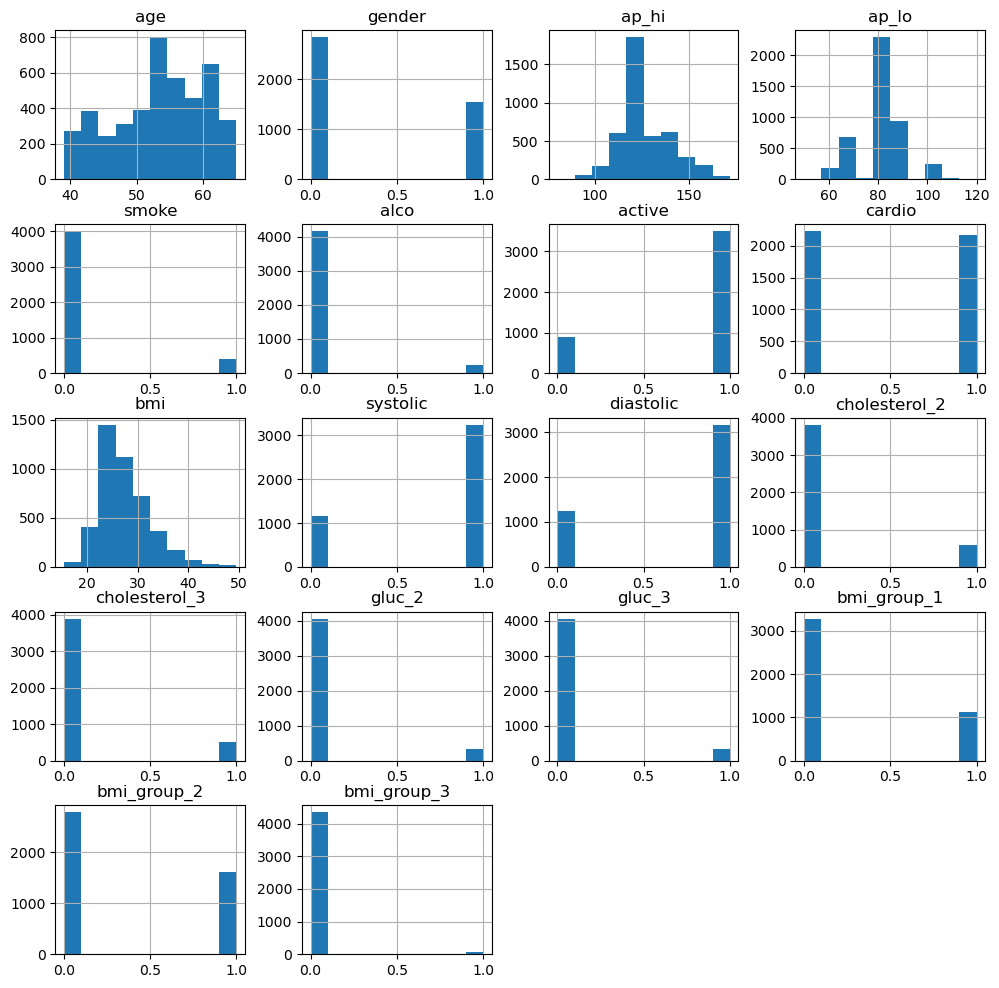

In [69]:
data.hist();

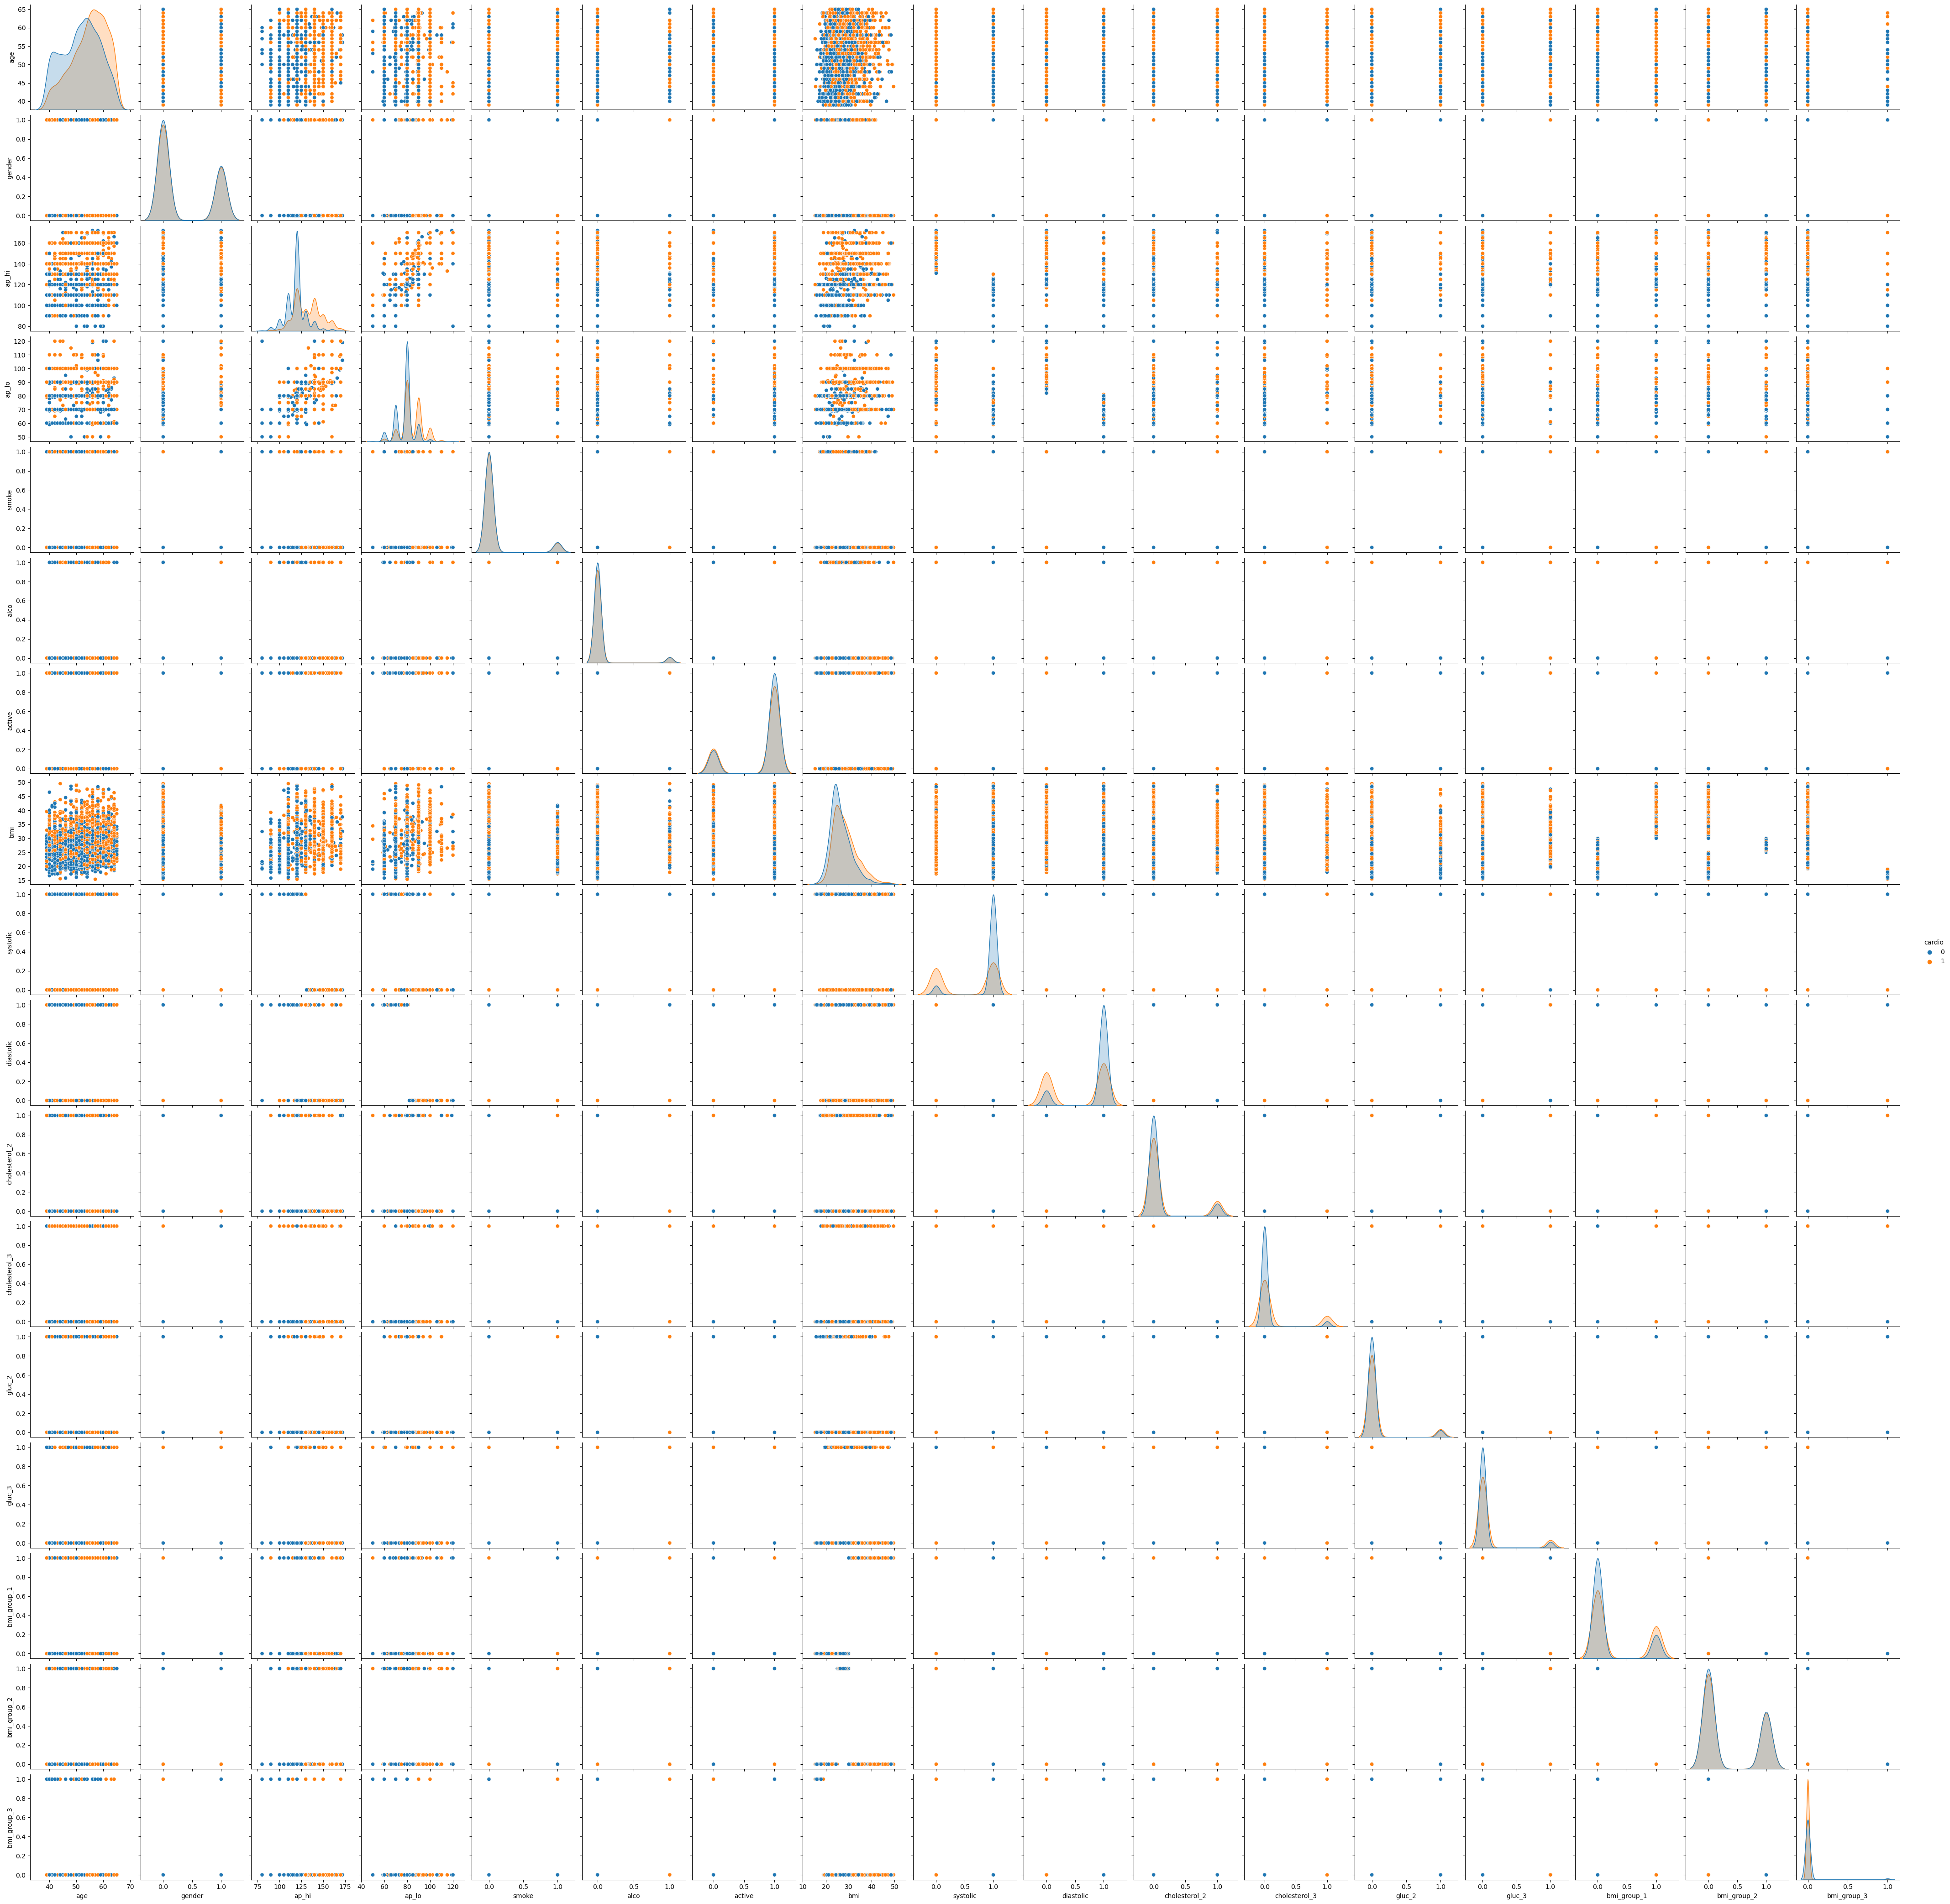

In [70]:
sns.pairplot(data,hue='cardio',size=2.5)

# Train Test split

In [71]:
# Split into features and labels
x = data.drop(['cardio'], axis=1)
y = data['cardio']

In [72]:
# Normalize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [73]:
from sklearn.model_selection import train_test_split,GridSearchCV
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [74]:

x_test.shape
x_train.shape

(3300, 17)

In [75]:
y_train.shape
y_test.shape

(1101,)

# logistic regression

In [76]:
log_reg = LogisticRegression(class_weight='balanced')
param_grid={
    'C': [0.01, 0.1, 1.0, 10, 100],
    'penalty': ['none', 'l1', 'l2', 'elasticnet'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# perform grid search with cross-validation to obtain the best hyperparameters
grid_search = GridSearchCV(log_reg, param_grid, cv=5)
grid_search.fit(x_train, y_train)

#print the best hyperparameters
print(grid_search.best_params_)


{'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}


In [77]:
#instantiate, fit, and predict with the logistic regression
log_reg = LogisticRegression(C=1.0, penalty='l2', solver='liblinear', class_weight='balanced')
log_reg.fit(x_train, y_train)
y_pred_lr = log_reg.predict(x_test)
y_pred_lr

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [78]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
confusion_matrix=confusion_matrix(y_pred_lr,y_test)
print(confusion_matrix)

[[479 181]
 [ 99 342]]


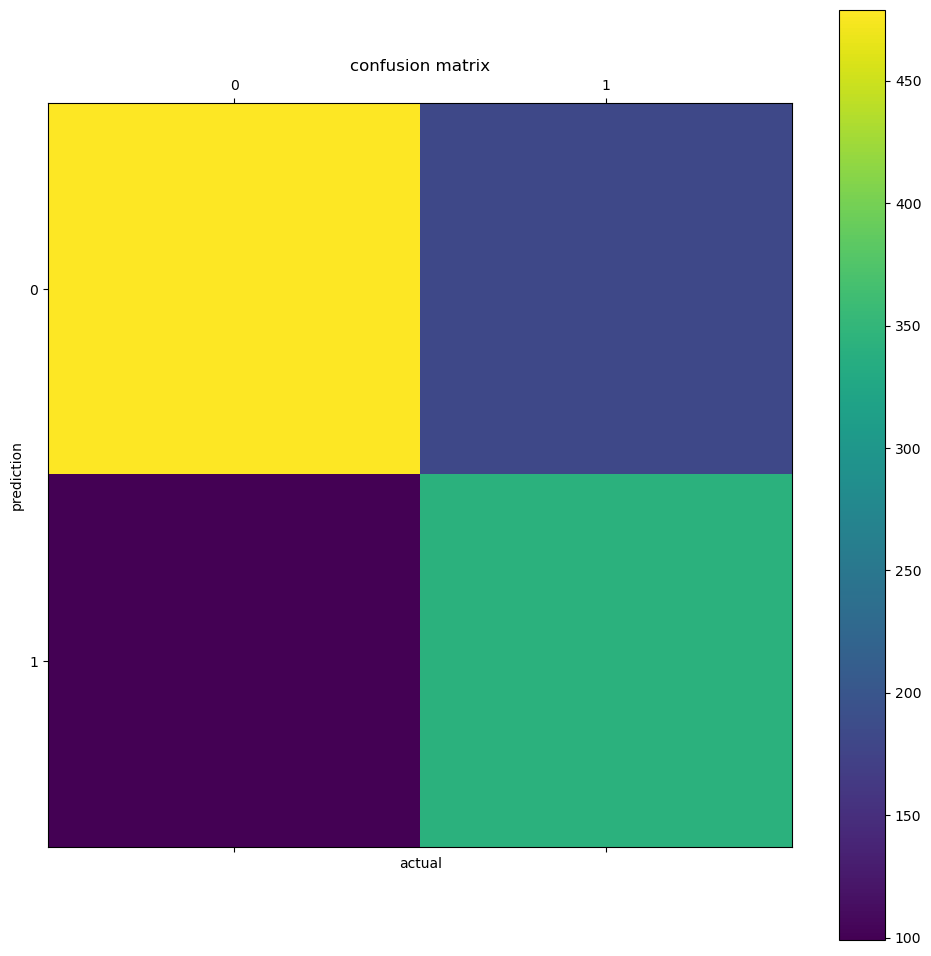

In [79]:
plt.matshow(confusion_matrix)
plt.title('confusion matrix')
plt.ylabel('prediction')
plt.xlabel('actual')
plt.colorbar()
plt.show()

In [80]:
#check for the accuracy score of the log_reg
score_log_reg = round(accuracy_score(y_test, y_pred_lr)*100,2)
score_log_reg

74.57

In [81]:
print("The accuracy score achieved using Logistic regression is: "+str(score_log_reg)+" %")

The accuracy score achieved using Logistic regression is: 74.57 %


In [82]:
#evaluate and print the train set accuracy
log_reg_train_accuracy = log_reg.score(x_train, y_train)
log_reg_train_accuracy

0.7233333333333334

In [83]:
#evaluate and print the test set accuracy
log_reg_test_accuracy = log_reg.score(x_test, y_test)
log_reg_test_accuracy

0.745685740236149

# SVM

In [84]:
from sklearn import svm

sv = svm.SVC(kernel='linear')
# from sklearn.svm import SVC
# sv = SVC()
sv.fit(x_train, y_train)

y_pred_svm = sv.predict(x_test)

In [85]:
y_pred_svm.shape

(1101,)

In [86]:
score_svm = round(accuracy_score(y_pred_svm,y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 73.48 %


In [87]:
#evaluate and print the train set accuracy
svm_train_accuracy = sv.score(x_train, y_train)
svm_train_accuracy

0.7106060606060606

In [88]:
#evaluate and print the test set accuracy
svm_test_accuracy = sv.score(x_test, y_test)
svm_test_accuracy

0.734786557674841

# K Nearest Neighbors

In [89]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)

In [90]:
y_pred_knn.shape

(1101,)

In [91]:
score_knn = round(accuracy_score(y_pred_knn,y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 71.66 %


In [92]:
#evaluate and print the train set accuracy
knn_train_accuracy = knn.score(x_train, y_train)
knn_train_accuracy

0.7527272727272727

In [93]:
#evaluate and print the test set accuracy
knn_test_accuracy = knn.score(x_test, y_test)
knn_test_accuracy

0.7166212534059946

# Naive Bayes

In [94]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(x_train,y_train)

y_pred_nb = nb.predict(x_test)

In [95]:
y_pred_nb.shape

(1101,)

In [96]:
score_nb = round(accuracy_score(y_pred_nb,y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 73.93 %


In [97]:
#evaluate and print the train set accuracy
nb_train_accuracy = nb.score(x_train, y_train)
nb_train_accuracy

0.7145454545454546

In [98]:
#evaluate and print the test set accuracy
nb_test_accuracy = nb.score(x_test, y_test)
nb_test_accuracy

0.7393278837420527

# Decision Tree

### Let's perform hyperparameter tuning for our Decision Tree model:

In [99]:
dt = DecisionTreeClassifier(class_weight='balanced')
param_grid = {
    'max_depth': [3,4,5,6,7,8],
    'min_samples_split': [2,3,4],
    'min_samples_leaf': [1,2,3,4],
    'random_state':[0, 42]
}

#perform grid search with cross-validation to obtain the best hyperparameters
grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(x_train, y_train)

#print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0}


In [100]:
#instantiate, fit, and predict with DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3, min_samples_leaf=1, min_samples_split=2, random_state=0)
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)

In [101]:
#check for the accuracy score of the dt
score_dt = round(accuracy_score(y_test, y_pred_dt)*100,2)
score_dt

73.39

In [102]:
print("The accuracy score achieved using Decision tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision tree is: 73.39 %


In [128]:
from sklearn import tree
tree_img=tree.export_graphviz(dt,out_file='tree1.dot',class_names=['non-cardio','cardio'],feature_names=data.drop(['cardio'], axis=1).columns,filled=True)

In [129]:
import matplotlib.pyplot as plt
!dot -Tpng tree1.dot -o tree1.png

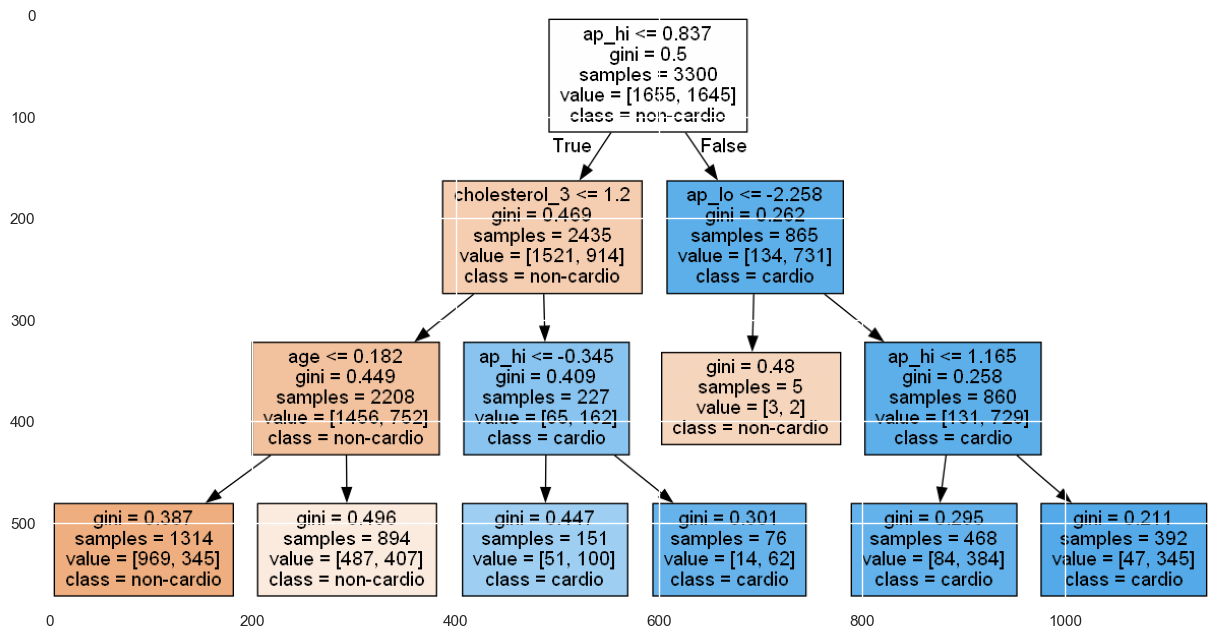

In [130]:
fig=plt.imread('tree1.png')
plt.imshow(fig)

In [103]:
#evaluate and print the train set accuracy
dt_train_accuracy = dt.score(x_train, y_train)
dt_train_accuracy

0.7121212121212122

In [104]:
#evaluate and print the test set accuracy
dt_test_accuracy = dt.score(x_test, y_test)
dt_test_accuracy

0.7338782924613987

# Random Forest

In [105]:
rfc = RandomForestClassifier(class_weight='balanced')
param_grid={
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'random_state': [0, 42]
}

#perform grid search with cross-validation to obtain the best hyperparameters
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(x_train, y_train)

#print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 200, 'random_state': 0}


In [106]:
#instantiate, fit, and predict with Random Forest Classifier
rfc = RandomForestClassifier(max_depth=10, max_features='sqrt', n_estimators=200, random_state=42, class_weight='balanced')
rfc.fit(x_train, y_train)
y_pred_rfc = rfc.predict(x_test)

In [107]:
#check for the accuracy score of the dt
score_rfc = round(accuracy_score(y_test, y_pred_rfc)*100,2)
score_rfc

74.3

In [108]:
print("The accuracy score achieved using RandomForest is: "+str(score_rfc)+" %")

The accuracy score achieved using RandomForest is: 74.3 %


In [109]:
#evaluate and print the train set accuracy
rfc_train_accuracy = rfc.score(x_train, y_train)
rfc_train_accuracy

0.8081818181818182

In [110]:
#evaluate and print the test set accuracy
rfc_test_accuracy = rfc.score(x_test, y_test)
rfc_test_accuracy

0.742960944595822

## Now, let's compare the accuracy of the three models we've deployed:

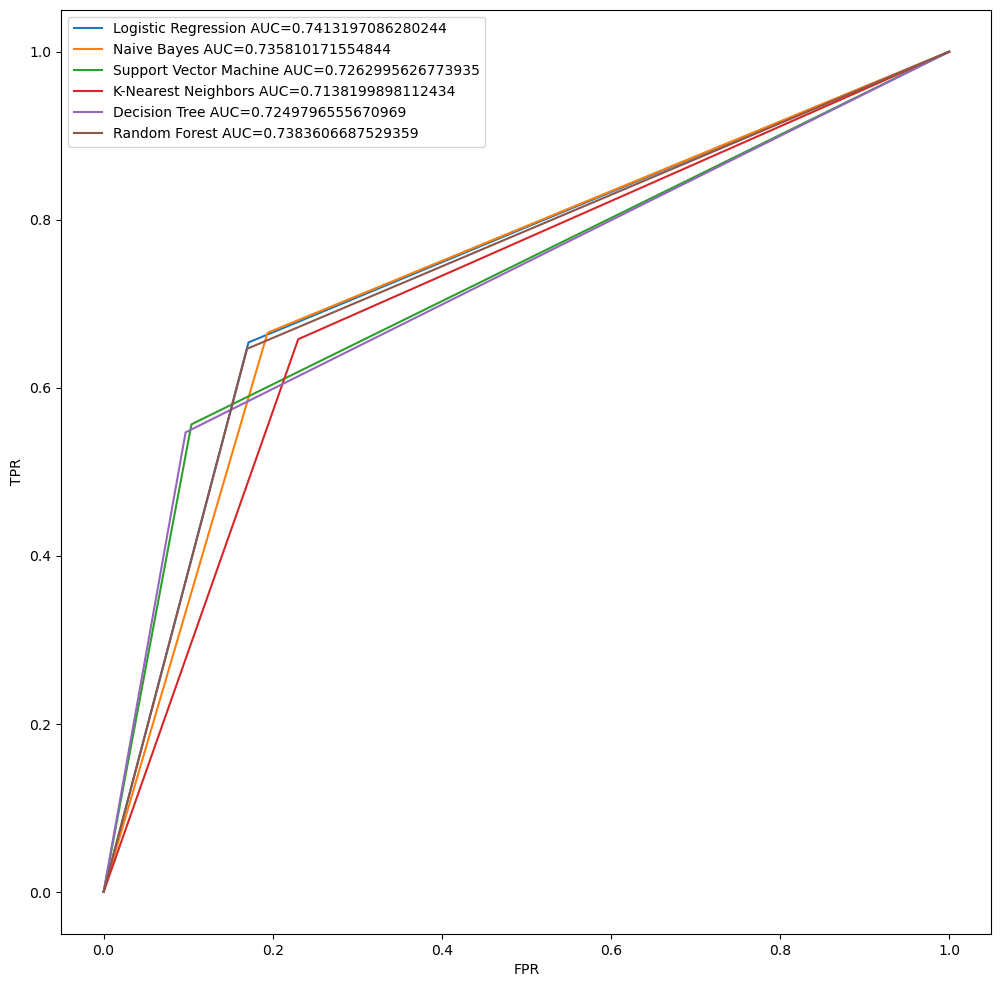

In [111]:
y_pred = [y_pred_lr,y_pred_nb,y_pred_svm,y_pred_knn,y_pred_dt,y_pred_rfc]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest"]    

for i in range(len(y_pred)):
    fpr,tpr,threshold=roc_curve(y_test,y_pred[i])
    auc_score=roc_auc_score(y_test,y_pred[i])
    plt.plot(fpr,tpr,label=algorithms[i]+" AUC={}".format(auc_score))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

In [112]:
scores = [score_log_reg,score_nb,score_svm,score_knn,score_dt,score_rfc]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 74.57 %
The accuracy score achieved using Naive Bayes is: 73.93 %
The accuracy score achieved using Support Vector Machine is: 73.48 %
The accuracy score achieved using K-Nearest Neighbors is: 71.66 %
The accuracy score achieved using Decision Tree is: 73.39 %
The accuracy score achieved using Random Forest is: 74.3 %


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

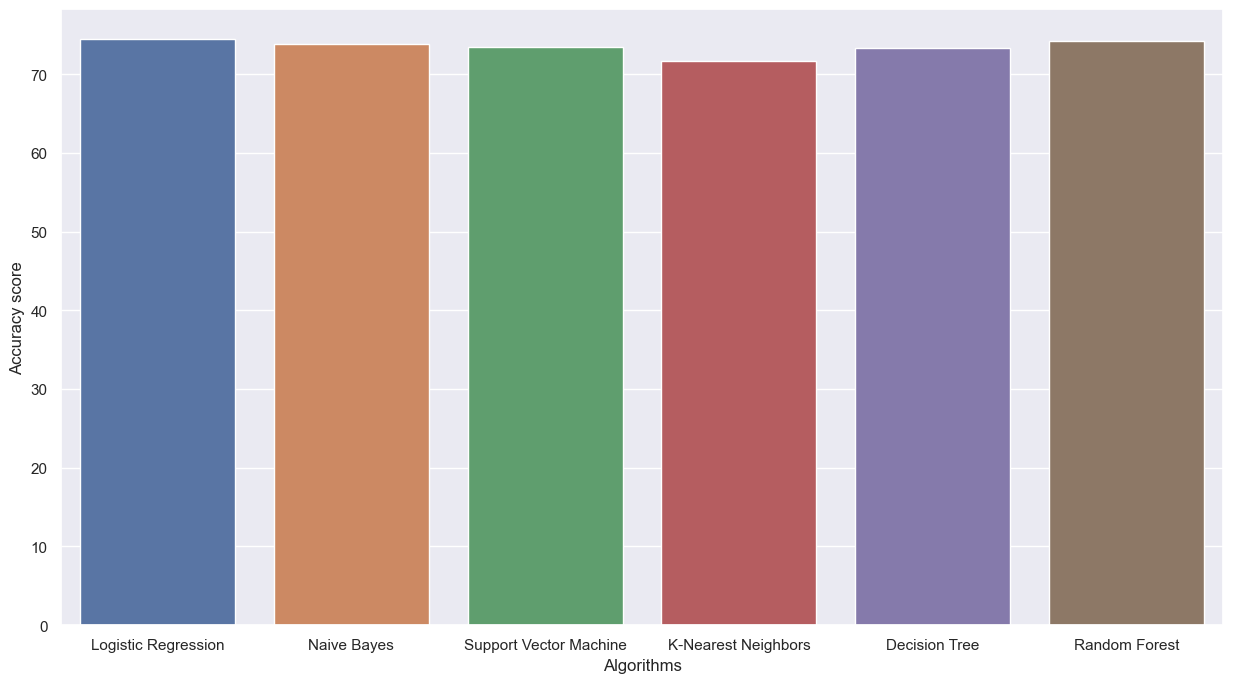

In [113]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)


In [114]:
models = pd.DataFrame({
    'Algorithms' : ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest"]    ,
    'Score_train': [log_reg_train_accuracy,nb_train_accuracy,svm_train_accuracy,knn_train_accuracy,dt_train_accuracy,rfc_train_accuracy],
    'Score_test': [log_reg_test_accuracy,nb_test_accuracy,svm_test_accuracy,knn_test_accuracy,dt_test_accuracy,rfc_test_accuracy],
                    })

In [115]:
models.sort_values(by=['Score_train', 'Score_test'], ascending=False)

,Algorithms,Score_train,Score_test
5,Random Forest,0.808182,0.742961
3,K-Nearest Neighbors,0.752727,0.716621
0,Logistic Regression,0.723333,0.745686
1,Naive Bayes,0.714545,0.739328
4,Decision Tree,0.712121,0.733878
2,Support Vector Machine,0.710606,0.734787


### Hey there random forest has good result as compare to other algorithms (handle categorical & nuemercals)

### Model should have better test_score than train score,then only it is considered as good  <br> <br>